# Bigmart Dataset

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# Importing Required libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import seaborn as sn

# Loading dataset

In [3]:
x=pd.read_csv('bigmart_train.csv')
y=pd.read_csv('bigmart_test.csv')

In [4]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
y

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [6]:
x["source"]="x"
y["source"]="y"
df=pd.concat([x,y],ignore_index=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,x
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,x
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,x
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,x
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,y
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,y
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,y
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,y


In [7]:
df.shape

(14204, 13)

In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [9]:
#checking the null values
df.isnull().sum()


Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [10]:
dfcor=df.corr()

<AxesSubplot:>

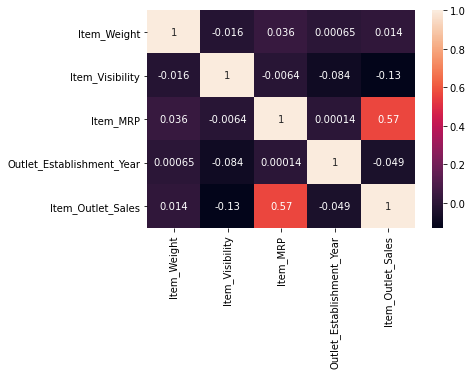

In [11]:
sn.heatmap(dfcor,annot=True)

In [12]:
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

FDH56    10
FDW03    10
FDA02    10
NCK53    10
FDP27    10
         ..
NCL42     7
FDH58     7
NCW54     7
FDM10     7
FDX49     7
Name: Item_Identifier, Length: 1559, dtype: int64

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64


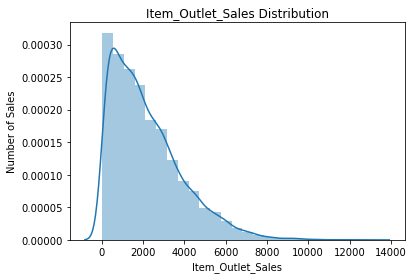

In [51]:
sn.distplot(df.Item_Outlet_Sales, bins=25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0, 1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")
plt.show()  # Distribution of item outlet sales

In [13]:
df["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)
df["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)
df["Item_Fat_Content"].replace("reg","Regular",inplace=True)

from above data we saw few different names for same time so i merge/replace the to one standard one.

In [14]:
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [15]:
df["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

solving null values 

In [16]:
twowaytable=pd.crosstab(df['Outlet_Size'],df['Outlet_Type'])
twowaytable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,1553,0,0
Medium,0,1550,1546,1559
Small,880,3100,0,0


In [17]:
twowaytable=pd.crosstab(df['Outlet_Size'],df['Outlet_Location_Type'])
twowaytable



Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,1553
Medium,1550,0,3105
Small,2430,1550,0


In [18]:
df['Item_Weight']=df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [19]:
df.Item_Weight.isnull().sum()

0

In [20]:
#filling Item_Weight by their corresponding Item_Type
List=['Baking Goods','Breads','Breakfast','Canned','Dairy','Frozen Foods','Fruits and Vegetables','Hard Drinks','Health and Hygiene','Household','Meat','Others','Seafood','Snack Foods','Soft Drinks','Starchy Foods']
Mean_values_Item_Type_df=df.groupby('Item_Type')['Item_Weight'].mean()
for i in List:
    d={i:Mean_values_Item_Type_df[i]}
    s=df.Item_Type.map(d)
    df.Item_Weight=df.Item_Weight.combine_first(s)
Mean_values_Item_Type_df=df.groupby('Item_Type')['Item_Weight'].mean()

In [21]:
d={'Grocery Store':'Small'}
s=df.Outlet_Type.map(d)
df.Outlet_Size=df.Outlet_Size.combine_first(s)

In [22]:
d={'Tier 2':'Small'}
s=df.Outlet_Location_Type.map(d)
df.Outlet_Size=df.Outlet_Size.combine_first(s)


In [23]:
df.isnull().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales             True
source                       False
dtype: bool

In [56]:
df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].fillna(0)


In [24]:
df.Item_Visibility.value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [25]:
df['Item_Visibility'].replace(0.00000,np.nan)#first fill by nan for simplicity
df['Item_Visibility'].fillna(df.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))


0        0.016047
1        0.019278
2        0.016760
3        0.000000
4        0.000000
           ...   
14199    0.013496
14200    0.142991
14201    0.073529
14202    0.000000
14203    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

In [26]:
df['Item_Visibility'].fillna(df.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

0        0.016047
1        0.019278
2        0.016760
3        0.000000
4        0.000000
           ...   
14199    0.013496
14200    0.142991
14201    0.073529
14202    0.000000
14203    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

In [27]:
#no of years outlet isopened
df['Outlet_Years']=2018-df['Outlet_Establishment_Year']

In [29]:
Mean_Visibility=df['Item_Visibility'].mean()

In [30]:
df['Item_Visibility_MeanRatio']=df.apply(lambda x:x['Item_Visibility']/Mean_Visibility,axis=1)

In [32]:
from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model
import sklearn.ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [33]:
#As Item Id and Outlet Id
#Convert categorical into numerical 
var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']
le=LabelEncoder()

In [34]:
#Item_Identifier and outlet_Identifier are also useful for making prediction so converting them too
df['Outlet']=le.fit_transform(df['Outlet_Identifier'])
df['Identifier']=le.fit_transform(df['Item_Identifier'])

In [36]:
for i in var_mod:
      df[i]=le.fit_transform(df[i])


In [37]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,Item_Visibility_MeanRatio,Outlet,Identifier
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,x,19,0.243315,9,156
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,x,9,0.292303,3,8
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,x,19,0.254122,9,662
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,2,2,0,732.3800,x,20,0.000000,0,1121
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,x,31,0.000000,1,1297


In [58]:
train = df.loc[df['source'] == "train"]
test = df.loc[df['source'] == "test"]

divided the data again

In [59]:
test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)
train.drop(['source'], axis=1, inplace=True)

drpped unrelevant data

In [62]:
# Export files as modified versions:
train.to_csv("bigmart_train.csv", index=False)
test.to_csv("bigmart_test.csv", index=False)


In [63]:
x=pd.read_csv('bigmart_train.csv')
y=pd.read_csv('bigmart_test.csv')

In [72]:
from sklearn.model_selection import cross_validate
from sklearn.metrics  import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)


ValueError: With n_samples=0, test_size=0.33 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.